# ANÁLISE LOTOFÁCIL  (CONCURSOS E GANHADORES)

 - Quantidade de concursos por ano e mês
 - Quantidade de ganhadores por ano e mês  
 - Análise de série temporal  
 

**Observação:** `Será necessário alterando para o diretório raíz do projeto para poder fazer imports locais`

In [1]:
cd ..

C:\Users\mekyl\Documents\GitHub\lotofacil


### Importações

In [2]:
# Ignorar avisos do Arima
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning, ValueWarning  
warnings.simplefilter('ignore', ConvergenceWarning)
warnings.simplefilter('ignore', ValueWarning)

# Importa a função para gerar a base de dados
from processamento.indice_resultado import dados_indice

# Importando pacote para análise de série temporal
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

# Criar gráfico
import plotly.graph_objs as go

# Para mostrar o gráfico no notebook 
import plotly.offline as py
py.init_notebook_mode(connected=True)

# Criar gráfico
import matplotlib.pyplot as plt
%matplotlib inline

# Para formatar datas
from datetime import datetime

### Funções

In [3]:

def grafico_linha_plt(x, y, title, xlabel, ylabel):
    """
    Função para criar um gráfico de linhas utilizando o Matplotlib.
    
    Parâmetros:
    x      -> Valores do eixo (x)
    y      -> Valores do eixo (y)
    title  -> Título do gráfico
    xlabel -> Rótulo do eixo (x)
    ylabel -> Rótulo do eixo (y)
    
    """
    
    # Define as dimenssões do gráfico
    plt.figure(figsize=(15, 5))
    
    # Define o título, rótulo x, rótulo y
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    # Cria o gráfico
    plt.plot(x, y, color='purple', marker='o', linestyle='dashed', linewidth=1.5, markersize=4)
    # Formata a linha de grade do gráfico
    plt.grid(linestyle='--', which='major', color='grey', alpha=.25)
    # Visualiza o gráfico
    plt.show()
    
    
def grafico_linha_go(x, y, title, xlabel, ylabel):
    """
    Função para criar um gráfico de linhas utilizando o Plotly.
    
    Parâmetros:
    x      -> Valores do eixo (x)
    y      -> Valores do eixo (y)
    title  -> Título do gráfico
    xlabel -> Rótulo do eixo (x)
    ylabel -> Rótulo do eixo (y)
    
    """
    
    # Criando o gráfico
    trace = go.Scatter(x=x, y=y, mode='markers+lines')

    # Armazenando gráfico em uma lista
    grafico = [trace]

    # Criando Layout
    layout = go.Layout(title=title, xaxis={'title': xlabel}, yaxis={'title': ylabel})

    # Criando figura que será exibida
    fig = go.Figure(data=grafico, layout=layout)

    # Visualiza o gráfico
    py.iplot(fig)

### Definição e análise dos dados

In [4]:
# Criando a base de dados
base = dados_indice()

In [5]:
# Mostra as informações da base de dados
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Concurso      1989 non-null   int64 
 1   Indice        1989 non-null   int64 
 2   Data Sorteio  1989 non-null   object
 3   Ganhou        1989 non-null   int64 
 4   Dia           1989 non-null   object
 5   Mes           1989 non-null   object
 6   Ano           1989 non-null   object
dtypes: int64(3), object(4)
memory usage: 108.9+ KB


In [6]:
# Converte para o tipo data
base['Data Sorteio'] = base['Data Sorteio'].apply(lambda _: datetime.strptime(_, '%d/%m/%Y'))

In [7]:
# Visualizando os tipos dos dados
base.dtypes

Concurso                 int64
Indice                   int64
Data Sorteio    datetime64[ns]
Ganhou                   int64
Dia                     object
Mes                     object
Ano                     object
dtype: object

In [8]:
# Visualiza as 5 primeiras linhas
base.head()

,Concurso,Indice,Data Sorteio,Ganhou,Dia,Mes,Ano
0,1,2320459,2003-09-29,5,29,09,2003
1,2,1672791,2003-10-06,1,06,10,2003
2,3,1768501,2003-10-13,2,13,10,2003
3,4,797916,2003-10-20,1,20,10,2003
4,5,927593,2003-10-27,2,27,10,2003


In [9]:
# Quantidade de concursos por ano
concursos_ano = base.groupby('Ano')['Concurso'].count()
concursos_ano

Ano
2003     14
2004     52
2005     52
2006     63
2007    104
2008    103
2009    104
2010    104
2011    104
2012    149
2013    151
2014    152
2015    152
2016    151
2017    150
2018    152
2019    153
2020     79
Name: Concurso, dtype: int64

In [10]:
# Quantidade de ganhadores por ano
ganhadores = base.groupby('Ano')['Ganhou'].sum()
ganhadores

Ano
2003     33
2004    219
2005    224
2006    294
2007    334
2008    472
2009    412
2010    389
2011    419
2012    814
2013    692
2014    688
2015    508
2016    486
2017    506
2018    547
2019    614
2020    271
Name: Ganhou, dtype: int64

In [11]:
# Definindo os dados para analisar a quantidade de concursos por ano
x_concursos = []
y_concursos = []

for k, v in dict(concursos_ano).items():
    x_concursos.append(k)
    y_concursos.append(v)

In [12]:
# Definindo os dados para analisar a quantidade de ganhadores por ano
x_ganhadores = []
y_ganhadores = []

for k, v in dict(ganhadores).items():
    x_ganhadores.append(k)
    y_ganhadores.append(v)

**Análise com o Plotly**

In [13]:
grafico_linha_go(x_ganhadores, y_ganhadores, 'Ganhadores x Ano', 'Ano', 'Quantidade de Ganhadores')

In [14]:
grafico_linha_go(x_concursos, y_concursos, 'Concursos x Ano', 'Ano', 'Quantidade de Concursos')

**Análise com o Matplotlib**

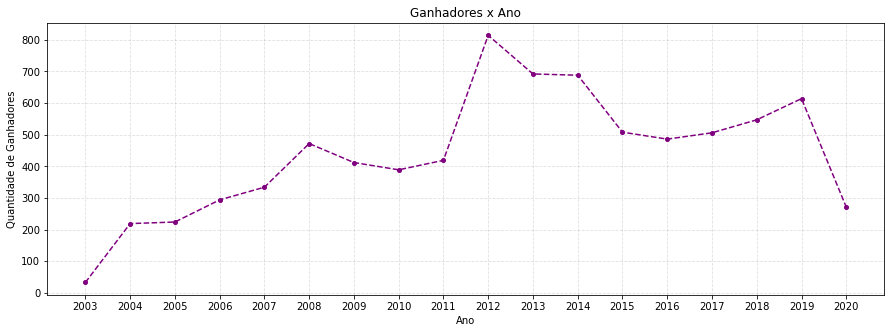

In [15]:
grafico_linha_plt(x_ganhadores, y_ganhadores, 'Ganhadores x Ano', 'Ano', 'Quantidade de Ganhadores')

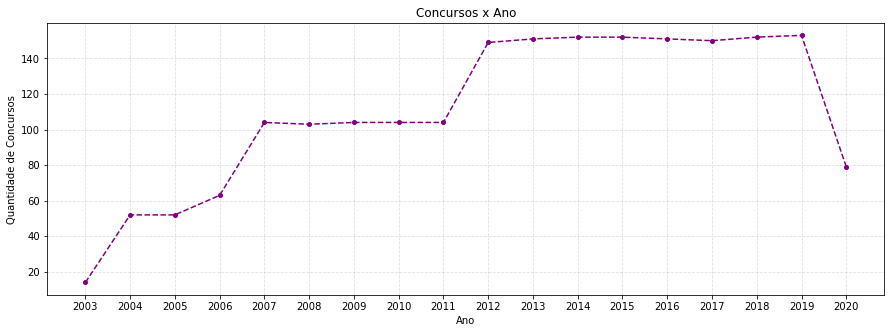

In [16]:
grafico_linha_plt(x_concursos, y_concursos, 'Concursos x Ano', 'Ano', 'Quantidade de Concursos')

In [17]:
# Definindo últimos anos
ano = str(base['Ano'].astype('int64').max() - 4)

In [18]:
# Quantidade de concursos por mês nos últimos 5 anos
base.groupby(['Ano', 'Mes'])['Concurso'].count()[ano:]

Ano   Mes
2016  01     13
      02     12
      03     13
      04     13
      05     13
      06     13
      07     13
      08     13
      09     11
      10     12
      11     12
      12     13
2017  01     13
      02     11
      03     14
      04     12
      05     13
      06     13
      07     13
      08     12
      09     10
      10     13
      11     13
      12     13
2018  01     14
      02     11
      03     13
      04     13
      05     13
      06     13
      07     13
      08     12
      09     10
      10     14
      11     13
      12     13
2019  01     13
      02     12
      03     12
      04     13
      05     14
      06     12
      07     14
      08     13
      09     11
      10     13
      11     13
      12     13
2020  01     13
      02     11
      03     13
      04     13
      05     13
      06     13
      07      3
Name: Concurso, dtype: int64

In [19]:
# Quantidade de ganhadores por mês nos últimos 5 anos
base.groupby(['Ano', 'Mes'])['Ganhou'].sum()[ano:]

Ano   Mes
2016  01     38
      02     43
      03     52
      04     31
      05     41
      06     38
      07     53
      08     32
      09     49
      10     42
      11     27
      12     40
2017  01     45
      02     31
      03     38
      04     19
      05     44
      06     81
      07     42
      08     57
      09     41
      10     37
      11     27
      12     44
2018  01     36
      02     37
      03     41
      04     33
      05     70
      06     45
      07     32
      08     32
      09     64
      10     83
      11     30
      12     44
2019  01     46
      02     63
      03     86
      04     46
      05     38
      06     51
      07     63
      08     44
      09     56
      10     58
      11     32
      12     31
2020  01     49
      02     49
      03     51
      04     40
      05     24
      06     45
      07     13
Name: Ganhou, dtype: int64

In [20]:
# Quantidade média de ganhadores por concurso em cada mês nos últimos 5 anos
base.groupby(['Ano', 'Mes'])['Ganhou'].mean()[ano:].round()

Ano   Mes
2016  01     3.0
      02     4.0
      03     4.0
      04     2.0
      05     3.0
      06     3.0
      07     4.0
      08     2.0
      09     4.0
      10     4.0
      11     2.0
      12     3.0
2017  01     3.0
      02     3.0
      03     3.0
      04     2.0
      05     3.0
      06     6.0
      07     3.0
      08     5.0
      09     4.0
      10     3.0
      11     2.0
      12     3.0
2018  01     3.0
      02     3.0
      03     3.0
      04     3.0
      05     5.0
      06     3.0
      07     2.0
      08     3.0
      09     6.0
      10     6.0
      11     2.0
      12     3.0
2019  01     4.0
      02     5.0
      03     7.0
      04     4.0
      05     3.0
      06     4.0
      07     4.0
      08     3.0
      09     5.0
      10     4.0
      11     2.0
      12     2.0
2020  01     4.0
      02     4.0
      03     4.0
      04     3.0
      05     2.0
      06     3.0
      07     4.0
Name: Ganhou, dtype: float64

_A partir de 2012, a quantidade de concurso começou a manter um padrão linear. Com base neste fato, iremos análisar o intervalo de tempo a partir deste ano._

In [21]:
# Perído de análise
ano_inicio = '2012'

In [22]:
# Dados análise
analise = base[base['Ano'] >= ano_inicio]

In [23]:
# Obtém os indices dos concursos que possuem e não possuem vencedores de acordo com o período estipulado
indice_c = base[(base['Ganhou'] > 0) & (base['Ano'] >= ano_inicio)]
indice_s = base[(base['Ganhou'] == 0) & (base['Ano'] >= ano_inicio)]

In [24]:
# Quantidade de concursos com e sem vencedores
s_vencedor = len(indice_s)
c_vencedor = len(indice_c)

In [25]:
# Quantidade
print(f'Qtde concurso sem vencedores: {s_vencedor} \nQtde concurso com vencedores: {c_vencedor}\nTotal: {len(analise)}')

Qtde concurso sem vencedores: 93 
Qtde concurso com vencedores: 1196
Total: 1289


## ANÁLISE DE SÉRIE TEMPORAL

In [26]:
# Reajustando os dados
ts = analise.query('Ano <= "2020"')
ts.reset_index(drop=True, inplace=True)

In [27]:
# Reajustando o campo de data
for indice, valor in ts['Data Sorteio'].items():
    ts.loc[indice, 'Data Sorteio'] = datetime.strptime(valor.strftime('%Y-%m'), '%Y-%m')

In [28]:
# Agregando os dados
ts = ts.groupby('Data Sorteio')['Ganhou'].sum()

In [29]:
# Quantidade de meses no perído que será avaliado
len(ts)

103

**Será avaliado no período:**

1 - _Tendência_  
2 - _sazionalidade_  
3 - _Variação_

In [30]:
grafico_linha_go(ts.index, ts.values, 'Ganhadores x Período', 'Período', 'Ganhadores');

In [31]:
# Decomposição da série temporal
decomposicao = seasonal_decompose(ts)
tendencia = decomposicao.trend
sazonal = decomposicao.seasonal
aleatorio = decomposicao.resid

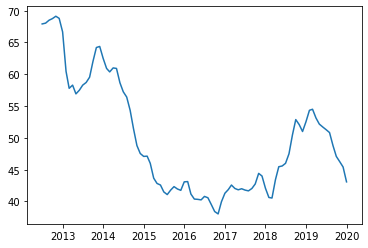

In [32]:
# Analisa a tendência
plt.plot(tendencia);

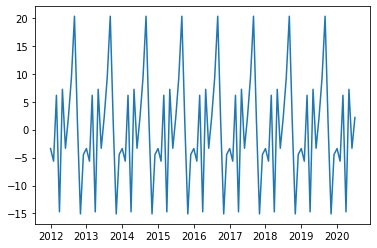

In [33]:
# Analisa a sazionalidade
plt.plot(sazonal);

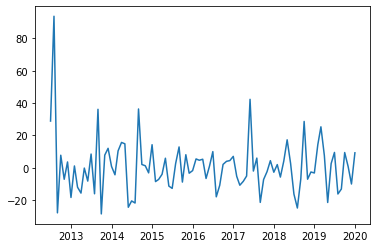

In [34]:
# Analisa as variações no período
plt.plot(aleatorio);

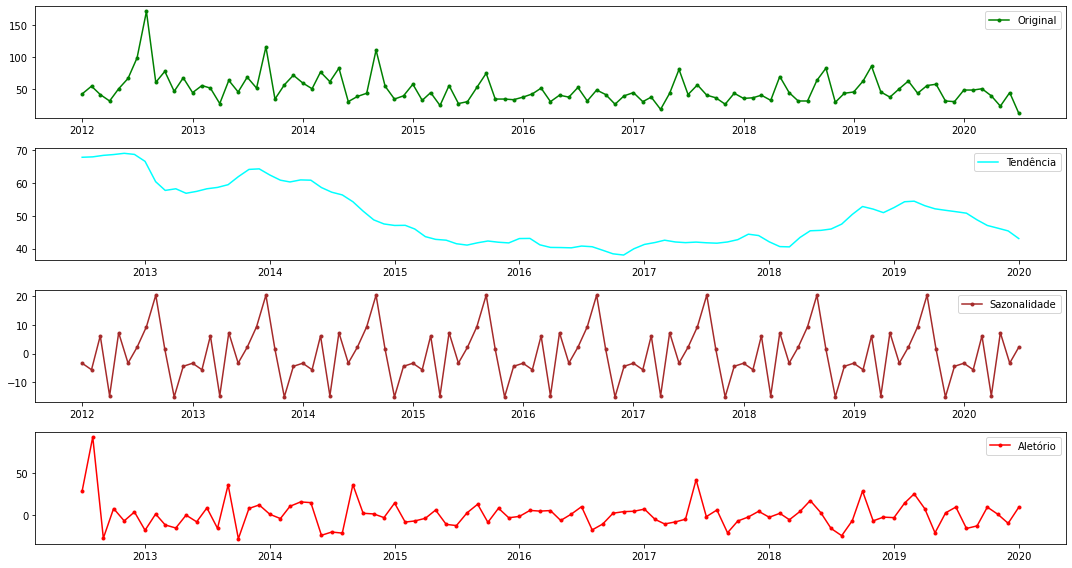

In [35]:
# Agrupado
plt.figure(figsize=(15, 8))

plt.subplot(4,1,1)
plt.plot(ts, label = 'Original', color='green', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,2)
plt.plot(tendencia, label = 'Tendência', color='cyan', marker='None', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,3)
plt.plot(sazonal, label = 'Sazonalidade', color='brown', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')

plt.subplot(4,1,4)
plt.plot(aleatorio, label = 'Aletório', color='red', marker='o', linestyle='solid', linewidth=1.5, markersize=3)
plt.legend(loc = 'best')
plt.tight_layout()

**PREVISÃO DE GANHADORES PARA OS PRÓXIMOS CONCURSOS**  

In [36]:
# Obtendo os parâmetros de ajuste do modelo
param = auto_arima(ts, m=12, seasonal=True, trace=False, suppress_warnings=True)
param.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  103
Model:             SARIMAX(0, 1, 1)x(0, 0, 1, 12)   Log Likelihood                -453.224
Date:                            Fri, 10 Jul 2020   AIC                            914.448
Time:                                    12:02:06   BIC                            924.947
Sample:                                         0   HQIC                           918.699
                                            - 103                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.2417      0.112     -2.165      0.030      -0.460      -0.023
ma.L1         -0.9999      7.659     -0.131      0.896     -16.012      14.012
ma.S.L12       0.3320      0.091      3.639      0.000       0.153       0.511
sigma2       401.3358   3073.966      0.131      0.896   -5623.527    6426.199
===================================================================================
Ljung-Box (Q):                       27.01   Jarque-Bera (JB):               210.35
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.37   Skew:                             1.73
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
# Criação e visualização das informações do modelo
modelo = ARIMA(ts, order=(0, 1, 1))
treino_modelo = modelo.fit()
treino_modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Ganhou   No. Observations:                  102
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -456.513
Method:                       css-mle   S.D. of innovations             21.047
Date:                Fri, 10 Jul 2020   AIC                            919.026
Time:                        12:02:06   BIC                            926.901
Sample:                    02-01-2012   HQIC                           922.215
                         - 07-01-2020                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2214      0.167     -1.325      0.185      -0.549       0.106
ma.L1.D.Ganhou    -0.9313      0.054    -17.313      0.000      -1.037      -0.826
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0738           +0.0000j            1.0738            0.0000
-----------------------------------------------------------------------------
"""

In [38]:
# Previsões para os próximos meses (steps = quantidade de meses)
previsao = treino_modelo.forecast(steps=12)[0]

In [39]:
previsao

array([40.28236431, 40.06092604, 39.83948777, 39.6180495 , 39.39661123,
       39.17517296, 38.95373469, 38.73229642, 38.51085815, 38.28941988,
       38.06798161, 37.84654334])

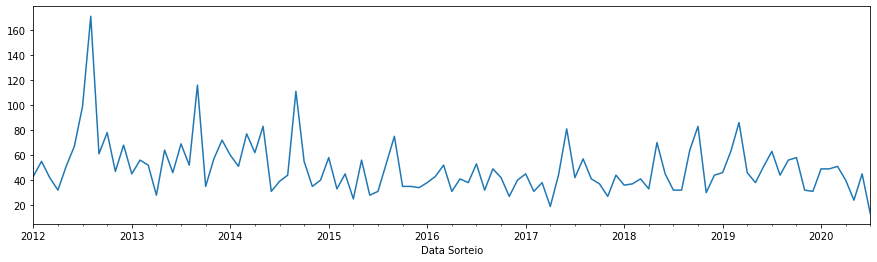

In [40]:
# Série original
plt.figure(figsize=(15, 4))
serie_original = ts.plot()

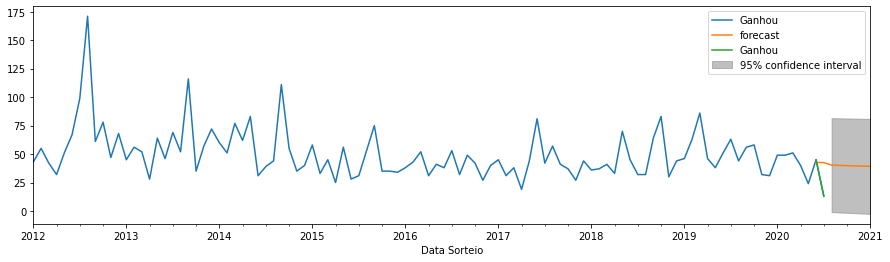

In [41]:
# Plotando as previsões
treino_modelo.plot_predict('2020-06-01', '2021-01-01', ax=serie_original, plot_insample=True)